# Twitter sentiment anlysis

In this project I will train Naive Bayes classifier to predict the sentiment from thousands of twitter tweets. This project can tell that whther their customers are happy or not.

In [72]:
#Importing the libraries
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [73]:
#Reading the file
data_train=pd.read_csv("train.csv")

In [74]:
data_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [75]:
#Shape of the data set
data_train.shape #31926 rows and 3 colums

(31962, 3)

In [76]:
#Information about data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [77]:
#Describe the data
data_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [78]:
#Counting the secific lable
data_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

label 0: Positive sentiment <br>
label 1: Negative sentiment

<AxesSubplot:xlabel='label', ylabel='count'>

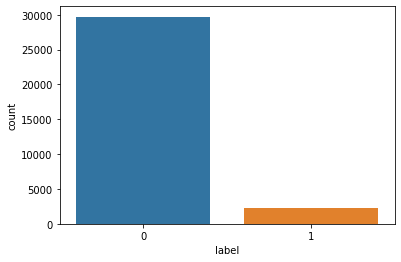

In [79]:
sns.countplot(x='label',data=data_train)

## Stopwords

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. ... Such words are already captured this in corpus named corpus.

In [80]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [81]:
stop # This are the stop words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [82]:
import re
def clean_text(text):
    text=re.sub("[^A-Za-z]",' ',text)
    text = text.lower().strip()
    text = ' '.join([e for e in text.split() if e not in stop])
    return text

In [83]:
data_train.tweet=data_train.tweet.apply(clean_text)
data_train.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit use cause offer w...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


## LEMMATIZATION

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [84]:
#Applying lemmatization to data
from nltk.stem.wordnet import WordNetLemmatizer
w = WordNetLemmatizer()
data_train.tweet=data_train.tweet.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()]))
data_train.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drag kid dys...
1,2,0,user user thank lyft credit use cause offer wh...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


## Countvectorizer

CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
cv_data=CountVectorizer()
bow_data=cv_data.fit_transform(data_train['tweet'])

In [86]:
bow_data.get_shape()

(31962, 34181)

In [87]:
cv_data.vocabulary_

{'user': 31738,
 'father': 10012,
 'dysfunctional': 8642,
 'selfish': 26570,
 'drag': 8370,
 'kid': 16223,
 'dysfunction': 8641,
 'run': 25860,
 'thank': 29827,
 'lyft': 18025,
 'credit': 6619,
 'use': 31730,
 'cause': 4861,
 'offer': 21593,
 'wheelchair': 32915,
 'vans': 31853,
 'pdx': 22639,
 'disapointed': 7889,
 'getthanked': 11707,
 'bihday': 3075,
 'majesty': 18211,
 'model': 19450,
 'love': 17711,
 'take': 29348,
 'time': 30380,
 'ur': 31695,
 'factsguide': 9805,
 'society': 27733,
 'motivation': 19730,
 'huge': 13956,
 'fan': 9904,
 'fare': 9935,
 'big': 3020,
 'talk': 29377,
 'leave': 16894,
 'chaos': 5068,
 'pay': 22585,
 'dispute': 7979,
 'get': 11679,
 'allshowandnogo': 796,
 'camp': 4513,
 'tomorrow': 30585,
 'danny': 7097,
 'next': 20789,
 'school': 26322,
 'year': 33765,
 'exams': 9566,
 'think': 30176,
 'hate': 13049,
 'imagine': 14429,
 'actorslife': 224,
 'revolutionschool': 25350,
 'girl': 11815,
 'land': 16671,
 'allin': 767,
 'cavs': 4871,
 'champion': 5038,
 'clev

In [88]:
print(cv_data.get_feature_names())

['aa', 'aaa', 'aaaaa', 'aaaaaand', 'aaaaah', 'aaaaand', 'aaahh', 'aaahhhh', 'aaahhhhh', 'aaand', 'aaawwwww', 'aaberg', 'aadityaji', 'aah', 'aakhri', 'aal', 'aalivyahsimon', 'aaliyah', 'aamaadmipay', 'aameer', 'aamirkhan', 'aande', 'aap', 'aapi', 'aaptards', 'aarakshan', 'aarhus', 'aaron', 'aaronorentas', 'aaronrhodes', 'aarya', 'aaryn', 'aascf', 'aayat', 'ab', 'aba', 'abandon', 'abantu', 'abasel', 'abba', 'abbey', 'abbibuckets', 'abbie', 'abbotabad', 'abbott', 'abbu', 'abby', 'abbyybelle', 'abc', 'abcdiscovers', 'abd', 'abdominal', 'abduct', 'abe', 'abeed', 'abella', 'abenomics', 'aberdeen', 'aberrant', 'aberystwyth', 'abet', 'abg', 'abglp', 'abhi', 'abhishek', 'abi', 'abide', 'abilities', 'ability', 'abitur', 'abject', 'abk', 'able', 'ableg', 'ableism', 'ablonde', 'abndp', 'abo', 'aboed', 'aboion', 'abomination', 'abou', 'aboutlastnight', 'aboutmynextmove', 'abouttime', 'abpoli', 'abraham', 'abrahamhicks', 'abrandnewday', 'abrazo', 'abricotines', 'abroad', 'abs', 'absence', 'absolut',

## Smote

Synthetic Minority Oversampling Technique is used to balance the target feature.It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [89]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
ip,op=smt.fit_sample(bow_data,data_train.label)

In [90]:
print(ip.shape,op.shape)

(59434, 34181) (59434,)


<AxesSubplot:xlabel='lable', ylabel='count'>

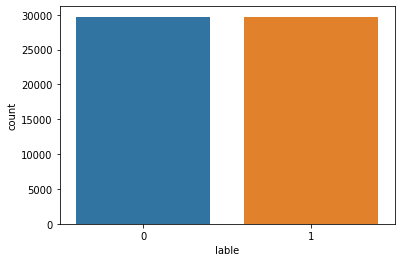

In [91]:
sample=pd.DataFrame({'lable':op})
sns.countplot(x='lable',data=sample)  # we can see that target value s correctly balanced

In [92]:
op.value_counts() #We can see that the data is balanced

1    29717
0    29717
Name: label, dtype: int64

In [93]:
#Slpitiing the data into test train 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2,random_state=62)

In [94]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(47547, 34181) (11887, 34181) (47547,) (11887,)


## BERNOULLI -- NAIVE BAYES

Bernoulli Naive Bayes is another useful naive Bayes model.It is binomial model is useful if your feature vectors are binary (i.e. zeros and ones). An application of Bernoulli Naive Bayes classification is Text classification with ‘bag of words’ model.

In [95]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
#training the model
bnb.fit(x_train,y_train)

BernoulliNB()

In [96]:
#Predicting the target values
y_pred=bnb.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [97]:
result = pd.DataFrame({'actual':y_test,'predict':y_pred})
result

,actual,predict
24440,0,0
23447,0,0
12837,0,0
52411,1,1
2435,0,0
...,...,...
37222,1,1
46569,1,1
32154,1,1
29886,0,0


In [98]:
#FINDING ACCURACY, F1 , PRECISION , RECALL SCORE

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5978
           1       0.92      0.97      0.94      5909

    accuracy                           0.94     11887
   macro avg       0.94      0.94      0.94     11887
weighted avg       0.94      0.94      0.94     11887



## TFIDF-VECTORIZER

TfidfVectorizer transforms text to feature vectors that can be used as input to estimator.It works by increasing proportionally to the number of times a word appears in a document, but is offset by the number of documents that contain the word

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
data1_bow = tfidf.fit_transform(data_train.tweet)
data1_bow

<31962x34181 sparse matrix of type '<class 'numpy.float64'>'
	with 244829 stored elements in Compressed Sparse Row format>

In [101]:
data1_bow.shape

(31962, 34181)

In [102]:
tfidf.vocabulary_

{'user': 31738,
 'father': 10012,
 'dysfunctional': 8642,
 'selfish': 26570,
 'drag': 8370,
 'kid': 16223,
 'dysfunction': 8641,
 'run': 25860,
 'thank': 29827,
 'lyft': 18025,
 'credit': 6619,
 'use': 31730,
 'cause': 4861,
 'offer': 21593,
 'wheelchair': 32915,
 'vans': 31853,
 'pdx': 22639,
 'disapointed': 7889,
 'getthanked': 11707,
 'bihday': 3075,
 'majesty': 18211,
 'model': 19450,
 'love': 17711,
 'take': 29348,
 'time': 30380,
 'ur': 31695,
 'factsguide': 9805,
 'society': 27733,
 'motivation': 19730,
 'huge': 13956,
 'fan': 9904,
 'fare': 9935,
 'big': 3020,
 'talk': 29377,
 'leave': 16894,
 'chaos': 5068,
 'pay': 22585,
 'dispute': 7979,
 'get': 11679,
 'allshowandnogo': 796,
 'camp': 4513,
 'tomorrow': 30585,
 'danny': 7097,
 'next': 20789,
 'school': 26322,
 'year': 33765,
 'exams': 9566,
 'think': 30176,
 'hate': 13049,
 'imagine': 14429,
 'actorslife': 224,
 'revolutionschool': 25350,
 'girl': 11815,
 'land': 16671,
 'allin': 767,
 'cavs': 4871,
 'champion': 5038,
 'clev

In [103]:
print(tfidf.get_feature_names())

['aa', 'aaa', 'aaaaa', 'aaaaaand', 'aaaaah', 'aaaaand', 'aaahh', 'aaahhhh', 'aaahhhhh', 'aaand', 'aaawwwww', 'aaberg', 'aadityaji', 'aah', 'aakhri', 'aal', 'aalivyahsimon', 'aaliyah', 'aamaadmipay', 'aameer', 'aamirkhan', 'aande', 'aap', 'aapi', 'aaptards', 'aarakshan', 'aarhus', 'aaron', 'aaronorentas', 'aaronrhodes', 'aarya', 'aaryn', 'aascf', 'aayat', 'ab', 'aba', 'abandon', 'abantu', 'abasel', 'abba', 'abbey', 'abbibuckets', 'abbie', 'abbotabad', 'abbott', 'abbu', 'abby', 'abbyybelle', 'abc', 'abcdiscovers', 'abd', 'abdominal', 'abduct', 'abe', 'abeed', 'abella', 'abenomics', 'aberdeen', 'aberrant', 'aberystwyth', 'abet', 'abg', 'abglp', 'abhi', 'abhishek', 'abi', 'abide', 'abilities', 'ability', 'abitur', 'abject', 'abk', 'able', 'ableg', 'ableism', 'ablonde', 'abndp', 'abo', 'aboed', 'aboion', 'abomination', 'abou', 'aboutlastnight', 'aboutmynextmove', 'abouttime', 'abpoli', 'abraham', 'abrahamhicks', 'abrandnewday', 'abrazo', 'abricotines', 'abroad', 'abs', 'absence', 'absolut',

In [104]:
tfidf.idf_

array([10.27372197,  9.9860399 , 10.67918708, ..., 10.67918708,
       10.67918708, 10.27372197])

In [105]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek(random_state=42)
ip,op=smt.fit_sample(data1_bow,data_train.label)

In [106]:
print(ip.shape)
print(op.shape)

(59440, 34181)
(59440,)


<AxesSubplot:xlabel='lable', ylabel='count'>

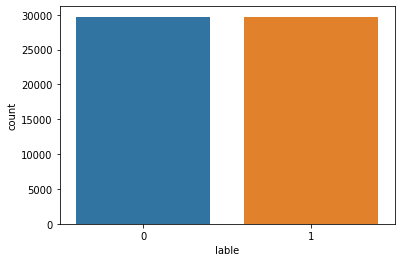

In [107]:
sample=pd.DataFrame({'lable':op})
sns.countplot(x='lable',data=sample)  # we can see that target value s correctly balanced

In [108]:
#SPLITTING THE DATASET INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2,random_state=62)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(47552, 34181) (11888, 34181) (47552,) (11888,)


In [109]:
# BERNOULLI MODEL 
from sklearn.naive_bayes import BernoulliNB
bnb1 = BernoulliNB()
#TRAINING THE MODEL
bnb1.fit(x_train,y_train)

BernoulliNB()

In [110]:
#TESTING
y_pred=bnb1.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [111]:
result = pd.DataFrame({'actual':y_test,'predict':y_pred})
result

,actual,predict
20509,0,0
14604,0,0
57399,1,1
7615,0,0
36721,1,1
...,...,...
30494,0,0
41062,1,1
6808,1,1
45305,1,1


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5937
           1       0.95      0.97      0.96      5951

    accuracy                           0.96     11888
   macro avg       0.96      0.96      0.96     11888
weighted avg       0.96      0.96      0.96     11888



## Conclusion 

Since the given dataset is Twitter tweets of type text document comes under Supervised classification . The target feature consist of only two values(1 and 0) , So Bernoulli naive bayes best suit for the given datset. Among CountVectorization and Tfidf-Vectorization, Our Model predicted good result to Tfidf-Vectorization rather than CountVectorization.Therefore Tfidf-Vectorization is best suited for the given dataset. The model gave the accuracy score of 0.96, f1 score 0.96, precision score 0.97 and recall score is 0.95

In [114]:
import pickle
# open a file, where you ant to store the data
file = open('Tweet.pkl', 'wb')

# dump information to that file
pickle.dump(bnb, file)
pickle.dump(bnb1,file)